In [2]:
#Import necessary modules
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import norm

In [3]:
#Vijay - Original Clean Up
#Bring in the data CSV
data = "cardio_train.csv"
cardio_df = pd.read_csv(data, delimiter = ';')
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#Vijay - Original Clean Up
#Clean up age & drop the unneeded ID column
cardio1_df= cardio_df.drop(['id'],axis=1)
# cardio1_df.active[cardio1_df.active == 1] = "True"
# cardio1_df.active[cardio1_df.active == 0] = "False"
age_upd = cardio1_df['age'].div(365)
rounded_age = round(age_upd)
cardio1_df.update(rounded_age)

#Convert to US understood numbers & add column for BMI
weight_upd = round(cardio1_df['weight']*2.2)
height_upd = round(cardio1_df['height'].div(2.54))

cardio1_df.update(weight_upd)
cardio1_df.update(height_upd)
cardio1_df.head()

cardio1_df["BMI"] = (cardio1_df['weight']*703)/(cardio1_df["height"]*cardio1_df["height"])
cardio1_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.0,2,66.0,136.0,110,80,1,1,0,0,1,0,21.948577
1,55.0,1,61.0,187.0,140,90,3,1,0,0,1,1,35.329481
2,52.0,1,65.0,141.0,130,70,3,1,0,0,0,1,23.461065
3,48.0,2,67.0,180.0,150,100,1,1,0,0,1,1,28.188906
4,48.0,1,61.0,123.0,100,60,1,1,0,0,0,0,23.238108


In [5]:
#Vijay - Original Clean Up
#Get Heart attack group data
cardio_1 = cardio1_df.groupby(["cardio"]).get_group(1)
cardio_1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
1,55.0,1,61.0,187.0,140,90,3,1,0,0,1,1,35.329481
2,52.0,1,65.0,141.0,130,70,3,1,0,0,0,1,23.461065
3,48.0,2,67.0,180.0,150,100,1,1,0,0,1,1,28.188906
7,62.0,2,70.0,209.0,130,90,3,3,0,0,1,1,29.985102
15,46.0,2,68.0,246.0,120,80,1,1,0,0,0,1,37.400087


In [6]:
#Vijay - Original Clean Up
#Group by No Heart Attack
cardio_0 = cardio1_df.groupby(["cardio"]).get_group(0)
cardio_0.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.0,2,66.0,136.0,110,80,1,1,0,0,1,0,21.948577
4,48.0,1,61.0,123.0,100,60,1,1,0,0,0,0,23.238108
5,60.0,1,59.0,147.0,120,80,2,2,0,0,0,0,29.687159
6,61.0,1,62.0,205.0,130,80,3,1,0,0,1,0,37.490895
8,48.0,1,62.0,156.0,110,70,1,1,0,0,1,0,28.529657


In [7]:
#Kendall
#Clean Cardio0 to remove outliers - negative and impossibly high BPs
cardio_0 = cardio_0[cardio_0['ap_lo'] >= 50]
cardio_0 = cardio_0[cardio_0['ap_lo'] < 200]
cardio_0.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.0,2,66.0,136.0,110,80,1,1,0,0,1,0,21.948577
4,48.0,1,61.0,123.0,100,60,1,1,0,0,0,0,23.238108
5,60.0,1,59.0,147.0,120,80,2,2,0,0,0,0,29.687159
6,61.0,1,62.0,205.0,130,80,3,1,0,0,1,0,37.490895
8,48.0,1,62.0,156.0,110,70,1,1,0,0,1,0,28.529657


In [8]:
#Kendall
#Clean Cardio1 to remove outliers - negative and impossibly high BPs
cardio_1 = cardio_1[cardio_1['ap_lo'] >= 50]
cardio_1 = cardio_1[cardio_1['ap_lo'] < 200]
cardio_1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
1,55.0,1,61.0,187.0,140,90,3,1,0,0,1,1,35.329481
2,52.0,1,65.0,141.0,130,70,3,1,0,0,0,1,23.461065
3,48.0,2,67.0,180.0,150,100,1,1,0,0,1,1,28.188906
7,62.0,2,70.0,209.0,130,90,3,3,0,0,1,1,29.985102
15,46.0,2,68.0,246.0,120,80,1,1,0,0,0,1,37.400087


In [9]:
#Kendall
#DBP ttest comparison for heart attack vs no heart attack
stats.ttest_ind(cardio_0['ap_lo'], cardio_1['ap_lo'], equal_var = False)

Ttest_indResult(statistic=-93.4076197256065, pvalue=0.0)

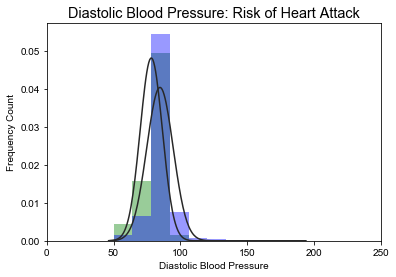

In [10]:
#Kendall
#Display the bell curve
cardio0_dbp = sns.distplot(cardio_0['ap_lo'], fit = norm, label = "DBP Heart ", color = "g", bins = 10, kde = False)
cardio1_dbp = sns.distplot(cardio_1['ap_lo'], fit = norm, label = "DBP Non Heart Attack", color = "b", bins = 10, kde = False)

#Change how it looks
sns.set_style("darkgrid")
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("deep")
cardio0_dbp.set(xlabel='Diastolic Blood Pressure', ylabel='Frequency Count', title = "Diastolic Blood Pressure: Risk of Heart Attack")
cardio1_dbp.set(xlabel='Diastolic Blood Pressure', ylabel='Frequency Count', title = "Diastolic Blood Pressure: Risk of Heart Attack")

#Set x limits
cardio0_dbp.set(xlim = [0,250])
cardio1_dbp.set(xlim = [0,250])

#Save the figure
cardio0_dbp.figure.savefig("DBP.png")
cardio1_dbp.figure.savefig("DBP.png")

In [11]:
#Kendall
#Find 1,2,3 Category Totals

#Get sums of 3 categories for No Heart Attack
cat1_0 = cardio_0[cardio_0['gluc']==1].count()
print(cat1_0['gluc'])
cat2_0 = cardio_0[cardio_0['gluc']==2].count()
print(cat2_0['gluc'])
cat3_0 = cardio_0[cardio_0['gluc']==3].count()
print(cat3_0['gluc'])

#Get sums of 3 categories for Yes Heart Attack
cat1_1 = cardio_1[cardio_1['gluc']==1].count()
print(cat1_1['gluc'])
cat2_1 = cardio_1[cardio_1['gluc']==2].count()
print(cat2_1['gluc'])
cat3_1 = cardio_1[cardio_1['gluc']==3].count()
print(cat3_1['gluc'])

30734
2091
2003
27900
2994
3245


In [12]:
#Kendall
#Create Chi Square DF
cs_data = pd.Series([cat1_0['gluc'], cat2_0['gluc'], cat3_0['gluc']], index = ["Normal", "Above Normal", "Well Above Normal"])
cs_exp = pd.Series([cat1_1['gluc'], cat2_1['gluc'], cat3_1['gluc']], index = ["Normal", "Above Normal", "Well Above Normal"])

cs_df = pd.DataFrame(cs_data)
cs_df[1] = cs_exp
cs_df

,0,1
Normal,30734,27900
Above Normal,2091,2994
Well Above Normal,2003,3245


In [13]:
#Kendall
#Run Chi Square
stats.chisquare(cs_df[0], cs_df[1])

Power_divergenceResult(statistic=1035.5834959331103, pvalue=1.3362911220535194e-225)

In [14]:
#Kendall
#Clean up chi data frame
cs_df.columns = ["No Heart Attack Glucose", "Heart Attack Glucose"]
cs_df

,No Heart Attack Glucose,Heart Attack Glucose
Normal,30734,27900
Above Normal,2091,2994
Well Above Normal,2003,3245


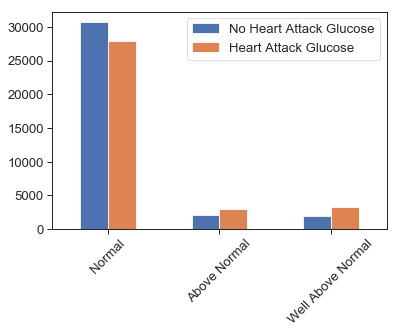

In [15]:
#Kendall
#Create bar graph for chi square for Glucose Levels
cardio_gluc = cs_df.plot.bar(rot=45)

In [16]:
#Dinesh
#Cleaning up ap hi data
cardio_1 = cardio1_df.groupby(["cardio"]).get_group(1)
cardio_1.head()
cardio_1 = cardio_1[cardio_1['ap_hi']>=50]
cardio_1 = cardio_1[cardio_1['ap_hi']<200]

In [17]:
#Dinesh
#Cleaning up ap hi data for 0
cardio_0 = cardio1_df.groupby(["cardio"]).get_group(0)
cardio_0.head()
cardio_0 = cardio_0[cardio_0['ap_hi']>=50]
cardio_0 = cardio_0[cardio_0['ap_hi']<200]

In [18]:
#Dinesh
#ttest for SBP
stats.ttest_ind(cardio_0['ap_hi'], cardio_1['ap_hi'], equal_var = False)

Ttest_indResult(statistic=-126.69948484685598, pvalue=0.0)

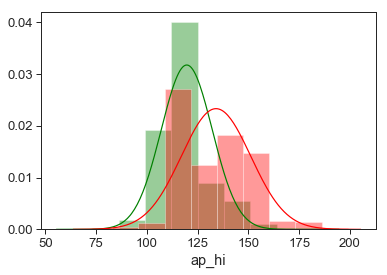

In [20]:
#Dinesh
#plot bell curve for SBP
ax0 = sns.distplot(cardio_0["ap_hi"], bins=10, fit=stats.norm, kde=False, label = "ap_hi - No attack", color = "g", fit_kws={"color":"green"})
ax1 = sns.distplot(cardio_1["ap_hi"], bins=10, fit=stats.norm, kde=False, label = "ap_hi - Attack", color ="r", fit_kws={"color":"red"})


In [21]:
#Dinesh
#Observed for cholesterol 

normal_chol_attack = len(cardio_1[cardio_1["cholesterol"] == 1])
print(normal_chol_attack)

above_normal_chol_attack = len(cardio_1[cardio_1["cholesterol"] == 2])
print(above_normal_chol_attack)

well_above_normal_chol_attack = len(cardio_1[cardio_1["cholesterol"] == 3])
print(well_above_normal_chol_attack)

22895
5691
6127


In [22]:
#Dinesh
#Create series for cholesterol
observed_cholesterol=pd.Series([normal_chol_attack,above_normal_chol_attack, well_above_normal_chol_attack],index = ['normal cholesterol', 'above normal cholesterol', 'well above normal cholesterol'])
observed_cholesterol

normal cholesterol               22895
above normal cholesterol          5691
well above normal cholesterol     6127
dtype: int64

In [23]:
#Dinesh
#Expected for Cholesterol

normal_chol_no_attack = len(cardio_0[cardio_0["cholesterol"] == 1])
print(normal_chol_no_attack)

above_normal_chol_no_attack = len(cardio_0[cardio_0["cholesterol"] == 2])
print(above_normal_chol_no_attack)

well_above_normal_chol_no_attack = len(cardio_0[cardio_0["cholesterol"] == 3])
print(well_above_normal_chol_no_attack)

29223
3780
1885


In [24]:
#Dinesh
#Created expected series for Cholesterol
expected_cholesterol=pd.Series([normal_chol_no_attack, above_normal_chol_no_attack, well_above_normal_chol_no_attack],index = ['normal cholesterol', 'above normal cholesterol', 'well above normal cholesterol'])
expected_cholesterol 

normal cholesterol               29223
above normal cholesterol          3780
well above normal cholesterol     1885
dtype: int64

In [26]:
#Dinesh
#Create cholesterol chi dataframe
df_chol = pd.DataFrame([observed_cholesterol,expected_cholesterol]).T
df_chol.columns = ['observed cholesterol','expected cholesterol']
df_chol.head()

,observed cholesterol,expected cholesterol
normal cholesterol,22895,29223
above normal cholesterol,5691,3780
well above normal cholesterol,6127,1885


In [27]:
#Dinesh
#Run chi square for cholesterol
stats.chisquare(df_chol['observed cholesterol'], df_chol['expected cholesterol'])

Power_divergenceResult(statistic=11882.580754299395, pvalue=0.0)

In [29]:
#Vin
#Create expected for chi test
active_cardio_0 = len(cardio_0[cardio_0["active"] == 1])
inactive_cardio_0 = len(cardio_0[cardio_0["active"] == 0])
total_0 = len(cardio_0["active"])
print (inactive_cardio_0, active_cardio_0, total_0)
expected = pd.Series([active_cardio_0,inactive_cardio_0], index=["Active", "Inactive"])
print(expected)

6353 28535 34888
Active      28535
Inactive     6353
dtype: int64


In [30]:
#Vin
#Create observed for chi test
active_cardio_1 = len(cardio_1[cardio_1["active"] == 1])
inactive_cardio_1 = len(cardio_1[cardio_1["active"] == 0])
total_1 = len(cardio_1["active"])
print (inactive_cardio_1, active_cardio_1, total_1)
observed = pd.Series([active_cardio_1,inactive_cardio_1], index=["Active", "Inactive"])
print(observed)

7301 27412 34713
Active      27412
Inactive     7301
dtype: int64


In [36]:
#Vin
#Create dataframe for Chi test
activitylevel_df = pd.DataFrame([observed,expected]).T
activitylevel_df.columns = ['Observed','Expected']
activitylevel_df.head()

,Observed,Expected
Active,27412,28535
Inactive,7301,6353


In [37]:
#Vin
#Run chi square test for active lifestyle
stats.chisquare(activitylevel_df['Observed'], activitylevel_df['Expected'])

Power_divergenceResult(statistic=185.65722156681613, pvalue=2.82047450002704e-42)

In [38]:
#Adil
# Height
stats.ttest_ind(cardio_0['height'], cardio_1['height'], equal_var = False)

Ttest_indResult(statistic=3.0369016848180057, pvalue=0.0023911186695552964)

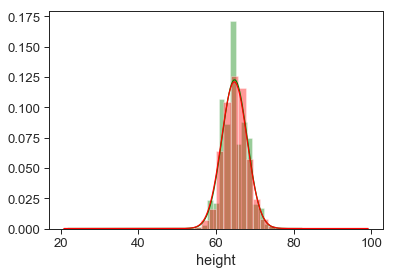

In [40]:
#Adil
#Create bell curve for height
sns.distplot(cardio_0['height'],fit=norm, kde=False, bins = 40, label = "height-No Heart Attack", color = "g", fit_kws={"color":"green"})
sns.distplot(cardio_1['height'],fit=norm, kde=False, bins = 40, label = "height-Heart Attack", color = "r", fit_kws={"color":"red"})


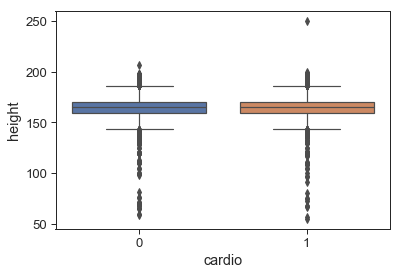

In [41]:
#Adil
# Box Plot
sns.boxplot(x='cardio',y='height', data=cardio_df)

In [42]:
#Adil
# BMI
stats.ttest_ind(cardio_0['BMI'], cardio_1['BMI'], equal_var = False)

Ttest_indResult(statistic=-44.17864038269167, pvalue=0.0)

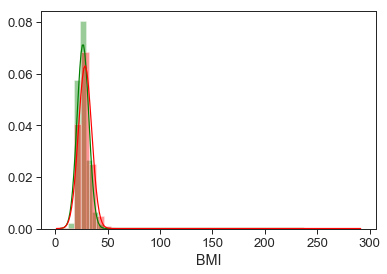

In [43]:
#Adil
#BMI bell curve
sns.distplot(cardio_0['BMI'],fit=norm, kde=False, bins = 40, label = "BMI-No Heart Attack", color = "g", fit_kws={"color":"green"})
sns.distplot(cardio_1['BMI'],fit=norm, kde=False, bins = 40, label = "BMI-Heart Attack", color = "r", fit_kws={"color":"red"})


In [45]:
#Adil
#Observed for chi for smoking
nosmoke_attack = len(cardio_1[cardio_1["smoke"] == 0])
print(nosmoke_attack)

smoke_attack = len(cardio_1[cardio_1["smoke"] == 1])
smoke_attack

#Create observed series
observed=pd.Series([nosmoke_attack,smoke_attack],index = ['non-smoking', 'smoking'])
observed

31812


non-smoking    31812
smoking         2901
dtype: int64

In [46]:
#Adil
#Expected for chi for smoking
nosmoke_noattack = len(cardio_0[cardio_0["smoke"] == 0])
nosmoke_noattack

smoke_noattack = len(cardio_0[cardio_0["smoke"] == 1])
smoke_noattack

#Create expected series
expected=pd.Series([nosmoke_noattack, smoke_noattack],index = ['non-smoking', 'smoking'])
expected

non-smoking    31659
smoking         3229
dtype: int64

In [48]:
#Adil
#Create chi dataframe for smoking
df = pd.DataFrame([observed,expected]).T
df.columns = ['observed','expected']
df

,observed,expected
non-smoking,31812,31659
smoking,2901,3229


In [49]:
#Adil
#Run chi test for smoking
stats.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=34.05746571956968, pvalue=5.350821262191846e-09)